<a href="https://colab.research.google.com/github/Anveshkh/Machine-Learning/blob/master/sk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### All values are numerical so we don't need to convert anything to numbers


In [8]:
# Check if we have any missing values or not
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### We don't have any missing data

In [11]:
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X.shape

(303, 13)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

X_train.shape, X_test.shape

((242, 13), (61, 13))

#### In X_train => 242 rows and 13 columns. In X_test => 61 rows and 13 columns.

'''
Here we have to predict if a patient has heart disease or not. So this is a classification problem.
We can either use:
1) Logistic Regression
2) Random Forest Classifier
3) Naive bayes classifier
4 Support Vector Machines
5) knn - K nearest neighbors
'''

## MODEL 1: Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [32]:
arr1 = np.array(y_test)
arr2 = np.array(y_preds)
print(arr1)
print(arr2)

[1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
[1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0]


In [33]:
model.score(X_test, y_test)

0.7868852459016393

### MODEL 2: Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1)

model.fit(X_train, y_train)

model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [56]:
model.score(X_test, y_test)

0.7704918032786885

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.7704918032786885

In [59]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, model.predict(X_test))

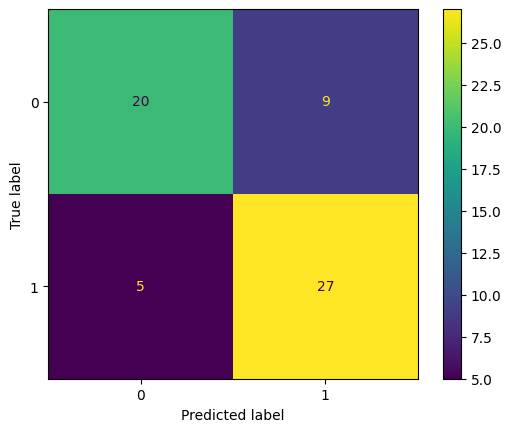

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(mat)
disp.plot()

In [61]:
47/61

0.7704918032786885

In [62]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, model.predict(X_test))
print(clf_report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### MODEL 3 => Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_preds = gnb.predict(X_test)

In [67]:
np.array(gnb_preds) == np.array(y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [68]:
X_train.shape

(242, 13)

In [74]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(X, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(X, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(X, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(X, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(X, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(X, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(X, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(X, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(X, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

In [75]:
model.score(X_test, y_test)

0.7704918032786885

In [76]:
from sklearn.metrics import classification_report

gnb_report = classification_report(y_test, gnb_preds)
print(gnb_report)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.79      0.94      0.86        32

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [77]:
from sklearn.metrics import accuracy_score

gnb_acc_score = accuracy_score(y_test, gnb_preds)
gnb_acc_score


0.8360655737704918

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

gnb_conf_matrix = confusion_matrix(y_test, gnb_preds)
gnb_conf_matrix

array([[21,  8],
       [ 2, 30]])

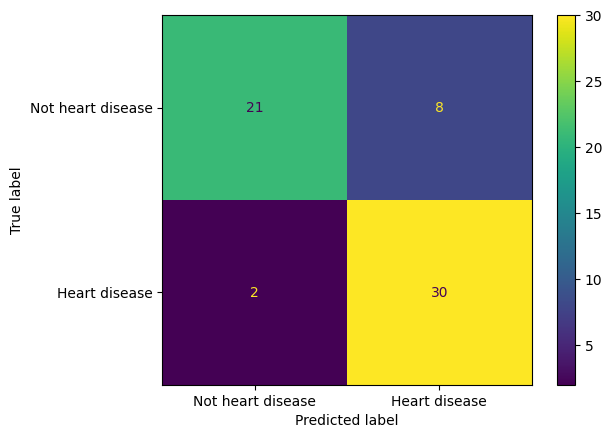

In [83]:
gnb_disp = ConfusionMatrixDisplay(gnb_conf_matrix, display_labels=["Not heart disease", "Heart disease"])
gnb_disp.plot()

In [84]:
51/61

0.8360655737704918

### MODEL 4 => Support Vector Machines

In [87]:
from sklearn import svm

svm_model = svm.SVC()

svm_model.fit(X_train, y_train)

SVC()

In [88]:
svm_model.score(X_test, y_test)

0.639344262295082

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_model.predict(X_test))

0.639344262295082

In [93]:
from sklearn.metrics import classification_report

svm_mat = classification_report(y_test, svm_model.predict(X_test))
print(svm_mat)

              precision    recall  f1-score   support

           0       0.68      0.45      0.54        29
           1       0.62      0.81      0.70        32

    accuracy                           0.64        61
   macro avg       0.65      0.63      0.62        61
weighted avg       0.65      0.64      0.63        61



In [96]:
from sklearn.metrics import confusion_matrix

svm_conf_mat = confusion_matrix(y_test, svm_model.predict(X_test))
svm_conf_mat

array([[13, 16],
       [ 6, 26]])

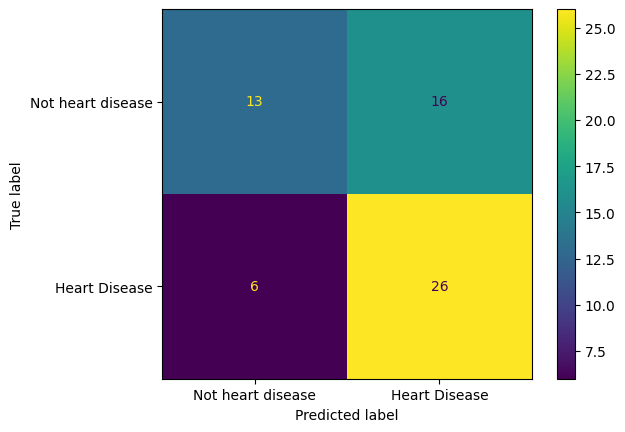

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

svm_disp = ConfusionMatrixDisplay(svm_conf_mat, display_labels=["Not heart disease", "Heart Disease"])
svm_disp.plot()

In [98]:
39/61

0.639344262295082

### MODEL 5 => Knearest Neighbor

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, weights="distance")

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [112]:
knn.score(X_test, y_test)

0.5409836065573771

In [113]:
acc = {}
for i in range(5, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  acc[i] = knn.score(X_test, y_test)

In [114]:
acc

{5: 0.5573770491803278,
 6: 0.5573770491803278,
 7: 0.5573770491803278,
 8: 0.5901639344262295,
 9: 0.5901639344262295,
 10: 0.5737704918032787,
 11: 0.5737704918032787,
 12: 0.5901639344262295,
 13: 0.6065573770491803,
 14: 0.5901639344262295,
 15: 0.6065573770491803,
 16: 0.5901639344262295,
 17: 0.5901639344262295,
 18: 0.5573770491803278,
 19: 0.5901639344262295}